# Data Visualization
## Author: Gustavo Amarante
Making charts using programming is usually not simple, but the results are worth the effort. 

Python has libraries for every need:

### Matplotlib
Started in 2003, inspired by the way MATLAB handles charts (so that engineers would feel at home when switching to python), this is the most popular library for making **static charts**. The advantage of matplotlib is that the charts are **higly customizable**. The downside is that it requires a lot of programming to do it, which makes it **code intensive**.

*Since matplotlib is focused on formatting, we will go through it very fast.*

### Seaborn
This one focuses on **statistical charts** and already comes with several visualization tools. Seaborn has a very high-level programming syntax, meaning that you can do a lot with very few lines of code.

We are going to spend a little more time on this one... it's worth it.

### Other ones you should have a look
* **altair**: Interactive charts but the commands are a bit hard to get.
* **bokeh**: Interactive charts and filtering options. Javascript based, so you can run the results in the browser.
* **plotly**: Great interactive visualizations and allows to deploy charts online in the form of dashboards. The full access to its resources is restricted to paying subscribers and the commands are not that simple.

---
# matplotlib

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Very simple example

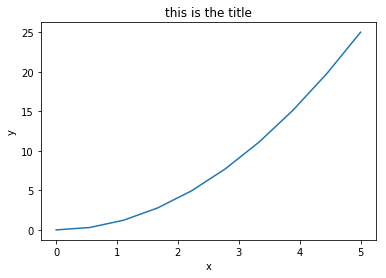

In [3]:
# generate data
x = np.linspace(0, 5, 10)
y = x ** 2

# plot the chart
plt.figure()
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('this is the title')
plt.show()

Getting a bit fancy with subplots (notice how similar it is to the MATLAB syntax)

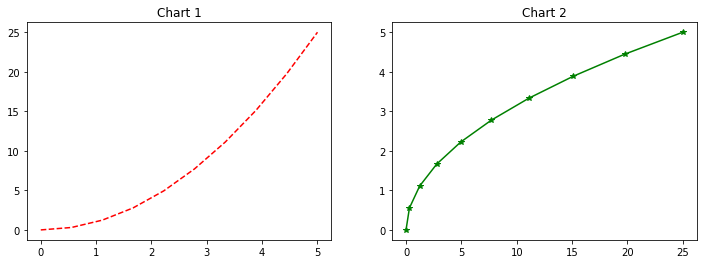

In [4]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(x, y, 'r--')  # dashed red line
plt.title('Chart 1')

plt.subplot(1,2,2)
plt.plot(y, x, 'g*-')  # green line with markers
plt.title('Chart 2')

plt.show()

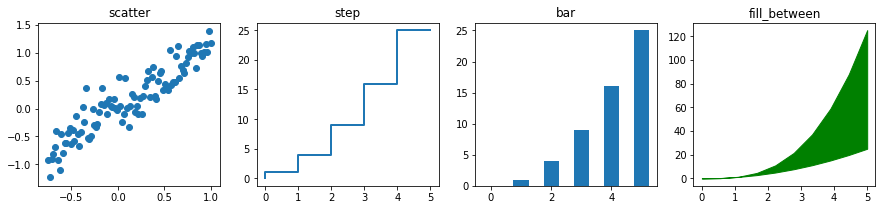

In [5]:
n = np.array([0,1,2,3,4,5])
xx = np.linspace(-0.75, 1., 100)

fig, axes = plt.subplots(1, 4, figsize=(15,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green")
axes[3].set_title("fill_between")

plt.show()

Here is an example with two axis on the same chart

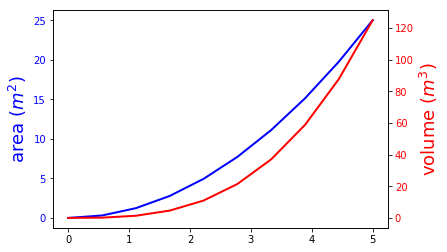

In [6]:
fig, ax1 = plt.subplots()

# plot the first series
ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")

# formats the left axis
for label in ax1.get_yticklabels():
    label.set_color("blue")

# create a new axis with the same x-axis as the second one.
ax2 = ax1.twinx()

# plots the series and formats the right axis
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")

for label in ax2.get_yticklabels():
    label.set_color("red")
    
plt.show()

As you can see from the examples above, the level of customization that you can get out of these charts is impressive. But again, it is very code intensive. The next chart is just to ilustrate that. I consider it a chart that has a little bit of everything, so whenever I need reference to a chart command, I usually go back to this example. I hope it helps you too.

Notice that axis labels, legends and comments accept $\LaTeX$ equations.

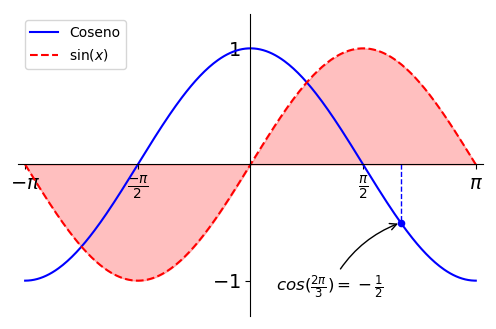

In [7]:
# Range of the function
x_min, x_max = -np.pi, np.pi

# number of intervals of the observations
interval = 300

# some padding to make the chart look nice
y_padding = 0.3
x_padding = 0.1

# creates the grid that will be used to plot the functions
X = np.linspace(x_min, x_max, interval)

# values of the functions f and g
f, g = np.cos(X), np.sin(X)

# name of the functions that will be used in the legend (it accepts LaTeX!!!)
labelf = 'Coseno'
labelg = '$\sin(x)$'

# creates the figure
plt.figure(figsize=(6, 4), dpi=100)

# plot the functions
plt.plot(X, f, color="blue", linewidth=1.5, linestyle="-", label=labelf)
plt.plot(X, g, color="red", linewidth=1.5, linestyle="--", label=labelg)

plt.fill_between(X, g, color='red',  alpha=.25)

# defines the limits of the chart
plt.xlim(x_min-x_padding, x_max+x_padding)
plt.ylim(np.min([f,g])-y_padding, np.max([f,g])+y_padding)

# defines the values and labels of the access ticks (labels accept LaTeX)
plt.xticks([-np.pi, -np.pi/2, np.pi/2, np.pi],
           [r'$-\pi$', r'$\frac{-\pi}{2}$', r'$\frac{\pi}{2}$', r'$\pi$'])
plt.yticks([-1, 1],
           [r'$-1$', r'$1$'])

# handling outside borders (turning them into the zero line)
ax = plt.gca()
ax.spines['right'].set_color('none')  # turns off the right outside border
ax.spines['top'].set_color('none')  # turns off the top outside border
ax.xaxis.set_ticks_position('bottom')  # set ticks position to be under the axis
ax.spines['bottom'].set_position(('data',0)) # set the 'bottom' as the zero line
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

# legend
plt.legend(loc='upper left')

# Annotations
t = 2 * np.pi / 3
plt.plot([t, t], [0, np.cos(t)], color='blue', linewidth=1.0, linestyle="--") # plota a linha pontilhada
plt.scatter([t, ], [np.cos(t), ], s=20, color='blue')  #plota o ponto na função

plt.annotate(r'$cos(\frac{2\pi}{3})=-\frac{1}{2}$', # text
             xy=(t, np.cos(t)), # coordinate of the annotated point
             xycoords='data', # unit of the coordinate of the annotated point
             xytext=(-90, -50), # coordinate of the annotation text
             textcoords='offset points', # unit of the coordinate of the annotation text (offset from point)
             fontsize=12,
             arrowprops=dict(arrowstyle="->", 
                             connectionstyle="arc3,rad=-.2"))

# formmating all tick labels
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(14)

# Save the chart as a PDF (if you want to do that, uncomment the next line)
# plt.savefig('test.pdf', dpi=400, pad_inches=0.)

plt.show()

## 3D Charts
Don't worry about the next cell, it just generates the data.

In [8]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

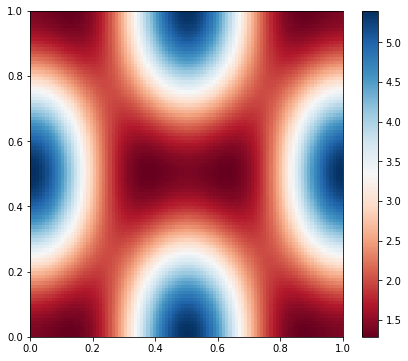

In [9]:
fig, ax = plt.subplots(figsize=(7,6))

p = ax.pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap='RdBu', vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)
plt.show()

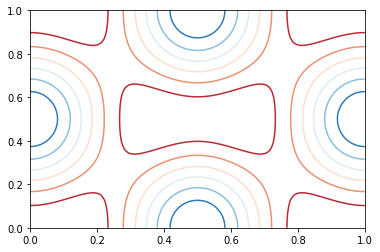

In [10]:
fig, ax = plt.subplots()

cnt = ax.contour(Z, cmap='RdBu', vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])
plt.show()

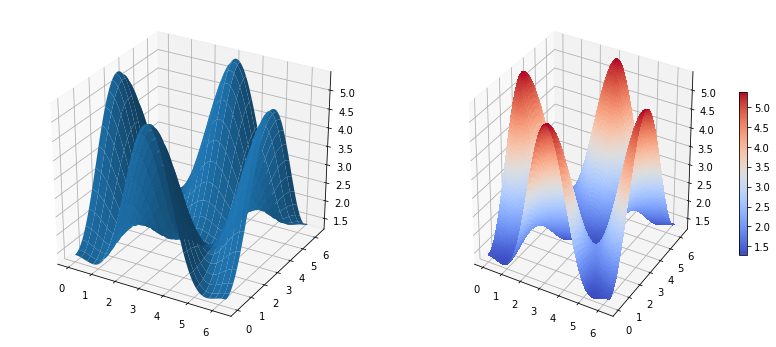

In [11]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='coolwarm', linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

plt.show()

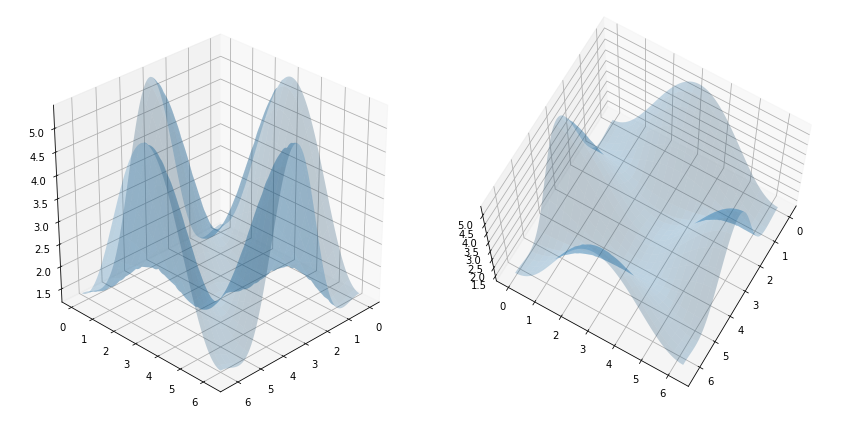

In [12]:
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(1,2,1, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(30, 45)  # This changes the viewing angle

ax = fig.add_subplot(1,2,2, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(70, 30)

fig.tight_layout()
plt.show()

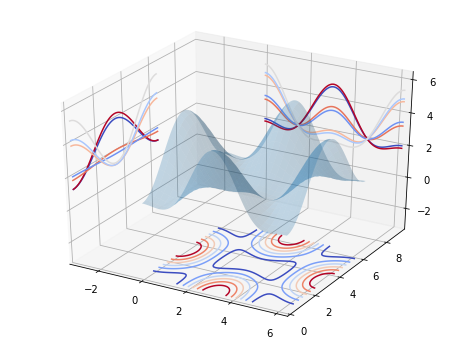

In [13]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap='coolwarm')
cset = ax.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap='coolwarm')
cset = ax.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap='coolwarm')

ax.set_xlim3d(-np.pi, 2*np.pi)
ax.set_ylim3d(0, 3*np.pi)
ax.set_zlim3d(-np.pi, 2*np.pi)

plt.show()

---
# Seaborn
It is built on top of matplotlib, but works like a high-level language, and is also integrated with pandas. Everything comes ready to use. They have a great [example gallery](https://seaborn.pydata.org/examples/index.html) that you can get inspiration (and cheat) from.

In [14]:
from scipy import stats  #ignore this one for now
import seaborn as sns
sns.set_style("darkgrid")

In the example below the data is drawn from a gamma distribution and the black line is an estimated chi square density.

C:\Users\gamarante\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


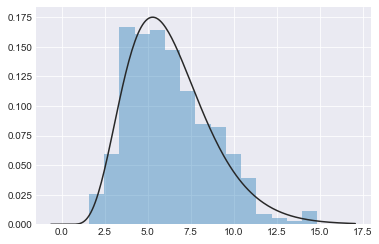

In [15]:
x = np.random.gamma(6, size=400)
sns.distplot(x, kde=False, fit=stats.chi2)

Now lets generate some 2-dimensional data from a multivariate normal distribution.

In [16]:
mean, cov = [0, 1], [[1, .5], [.5, 1]]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["var 1", "var 2"])
df.sample(3)

,var 1,var 2
112,-0.690119,0.891309
116,1.128726,0.699328
157,-2.014186,-0.649860


C:\Users\gamarante\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\gamarante\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


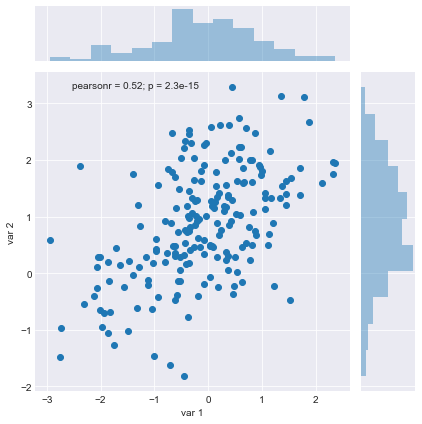

In [20]:
sns.jointplot(x='var 1', y='var 2', data=df)  # try different kinds (hex, kde)

The seaborn library has example datasets that you can grab using `sns.load_dataset()` method. For the next examples we are going to use the "Tips" dataset.

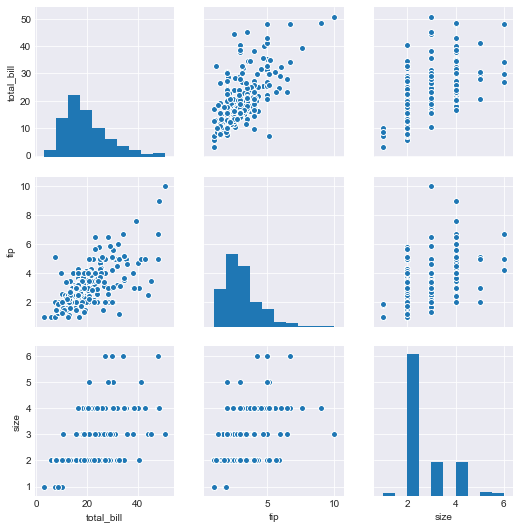

In [21]:
tips = sns.load_dataset("tips")
sns.pairplot(tips)

`stripplot` and `swarmplot` are charts that show **all of the observations**

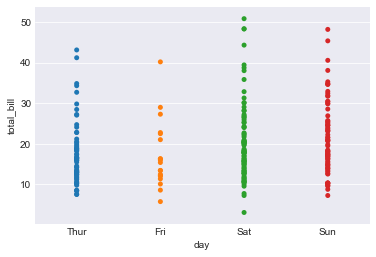

In [23]:
sns.stripplot(x="day", y="total_bill", data=tips)  # try 'jitter=True'

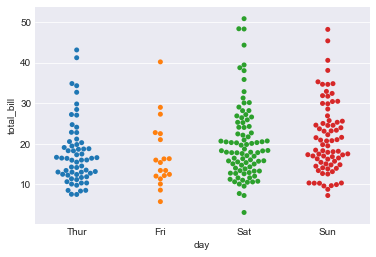

In [25]:
sns.swarmplot(x="day", y="total_bill", data=tips)  # try hue='sex'

`boxplot` and `violinplot` are charts that show **representations of the data distribution**

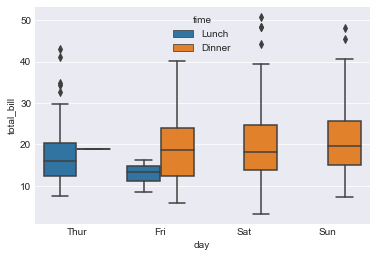

In [22]:
sns.boxplot(x="day", y="total_bill", hue="time", data=tips)

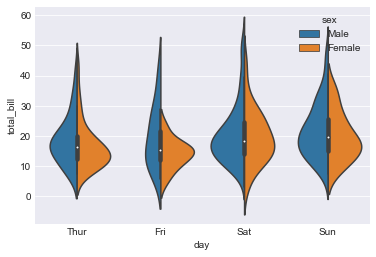

In [23]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True)  # try split=True

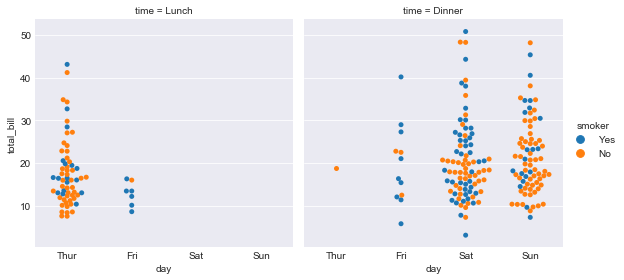

In [24]:
sns.factorplot(x="day", y="total_bill", hue="smoker", col="time", data=tips, kind="swarm")

We can also look ad the relationship between variables using `regplot` and `lmplot`

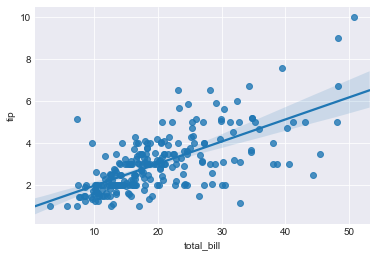

In [26]:
sns.regplot(x="total_bill", y="tip", data=tips)  # try ci=False

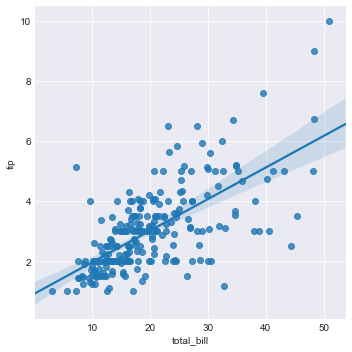

In [27]:
# sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", row="sex", ci=False, data=tips)
sns.lmplot(x="total_bill", y="tip", data=tips)

# Example with Financial Data - Correlations Heatmap
Let's load some stock prices, compute returns and their correlations and draw a cluster map

In [30]:
df_stocks = pd.read_excel('data/stocks_portfolio.xlsx', sheet_name='Values')
df_stocks.columns = df_stocks.columns.str.slice(0, 5)  # Rename columns with the tickers
df_returns = df_stocks.pct_change(1).dropna(how='any')

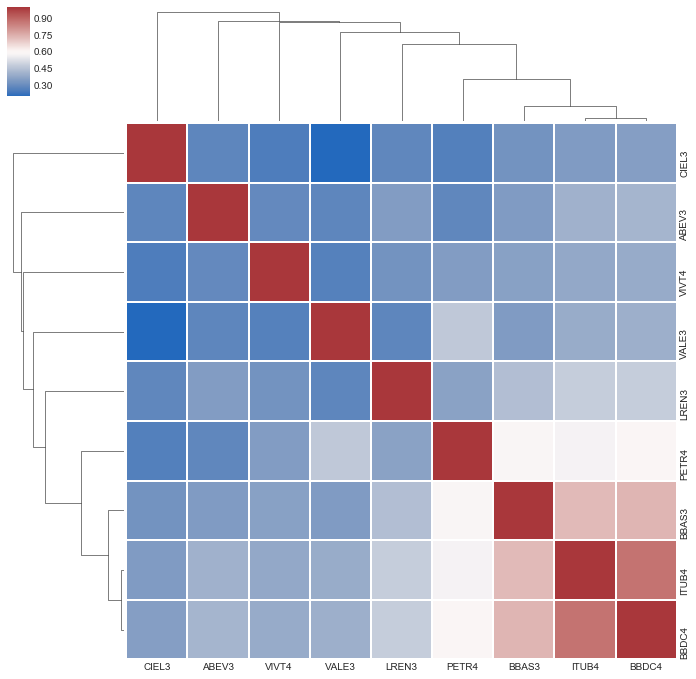

In [41]:
sns.clustermap(df_returns.corr(), cmap='vlag', linewidths=1, figsize=(12, 12), metric='correlation')